In [10]:
import os 
import pandas as pd
import shutil
import numpy as np
from collections import defaultdict
import json
from ast import literal_eval

## fma small

In [3]:
for subdir in os.listdir("../fma_small/"):
    root = os.path.join("../fma_small",subdir)
    if os.path.isdir(root):
        for mp3 in os.listdir(root):
            ini = os.path.join(root,mp3)
            out = os.path.join("../mp3_files/",mp3)
            shutil.copy(ini,out)

In [105]:
fma_genres = pd.read_csv("../fma_metadata/genres.csv")
genre_names = dict(zip(fma_genres['genre_id'].values,fma_genres['title']))


fma_data = pd.read_csv("../fma_metadata/tracks.csv")

col_headers = fma_data.loc[0].values
fma_data = pd.DataFrame(fma_data[1:].values,columns=col_headers)
fma_data = fma_data.rename(columns={np.nan: 'track_id'})
fma_data = fma_data[1:]
fma_data['track_id'] = fma_data['track_id'].astype(int)
fma_data.set_index("track_id",inplace=True)

/home/matt/anaconda3/envs/AudioDL/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
# genre_id_dict = defaultdict(list)
# for genre_dir in [d for d in os.listdir("../mp3_files/") if os.path.isdir("../mp3_files/"+d)]:
#     for mp3_file in os.listdir("../mp3_files/"+genre_dir):
#         track_id = mp3_file.split(".")[0]
#         genre = fma_data.loc[int(track_id)]['genre_top']
#         genre_id_dict[genre].append(mp3_file)

with open("../Genre_Track_Id_Dict.json","r") as j:
    genre_id_dict = json.load(j)

In [16]:
for genre,filename_set in genre_id_dict.items():
    genre_path = os.path.join("../mp3_files",genre)
    if not os.path.exists(genre_path):
        os.mkdir(genre_path)
    
    for filename in filename_set:
        input_file = "../mp3_files/{}".format(filename)
        output_file = os.path.join(genre_path,filename)
        shutil.copy(input_file,output_file)
    

In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
# import tifffile


y,sr = librosa.load("../mp3_files/Hip-Hop/000002.mp3")
# mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, 
#                                      hop_length=1024, 
#                                win_length=None, window='hann',
#                                center=True, pad_mode='reflect',
#                                power=2.0)
# mel_db = librosa.power_to_db(mel, ref=np.max)
# librosa.display.specshow(mel_log)


/home/matt/anaconda3/envs/tf/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


NoBackendError: 

# fma large

In [8]:
for subdir in os.listdir("../fma_large/fma_large"):
    root = os.path.join("../fma_large/fma_large",subdir)
    if os.path.isdir(root):
        for mp3 in os.listdir(root):
            ini = os.path.join(root,mp3)
            out = os.path.join("../mp3_files_large/",mp3)
            shutil.move(ini,out)


In [11]:
fma_genres = pd.read_csv("../fma_metadata/genres.csv")
genre_names = dict(zip(fma_genres['genre_id'].values,fma_genres['title']))


fma_data = pd.read_csv("../fma_metadata/tracks.csv")

col_headers = fma_data.loc[0].values
fma_data = pd.DataFrame(fma_data[1:].values,columns=col_headers)
fma_data = fma_data.rename(columns={np.nan: 'track_id'})
fma_data = fma_data[1:]
fma_data['track_id'] = fma_data['track_id'].astype(int)
fma_data.set_index("track_id",inplace=True)

/home/matt/anaconda3/envs/AudioDL/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [156]:
genres = pd.read_csv("../fma_metadata/genres.csv")
root_genres = genres[genres['parent']==0]
root_genres = root_genres[root_genres['#tracks']>1000]

root_genre_ids = list(root_genres['genre_id'])
cutoff_genres = list(genres[(genres["#tracks"]>4000)]["genre_id"].values)

In [74]:
[c for c in fma_data.columns if 'genre' in c]

['genre_top', 'genres', 'genres_all']

In [125]:
mask = fma_data.genres.apply(lambda x: any([z in literal_eval(x) for z in cutoff_genres]))
keeping_tracks = fma_data[mask]

(array([4.0663e+04, 2.8568e+04, 1.6015e+04, 2.2710e+03, 5.0900e+02,
        6.2700e+02, 5.7000e+01, 6.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

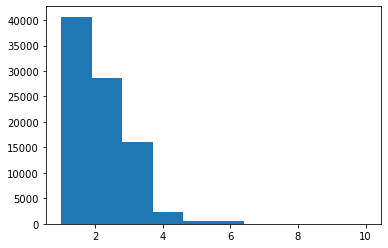

In [157]:
num_keeping_genres_per_track = []
for gs in keeping_tracks["genres"]:
    g_list = literal_eval(gs)
    num_keeping_genres_per_track.append(len([c for c in g_list if c in cutoff_genres]))
plt.hist(num_keeping_genres_per_track)

In [158]:
root_mask = fma_data.genres.apply(lambda x: any([z in literal_eval(x) for z in root_genre_ids]))
keeping_root_tracks = fma_data[root_mask]

(array([4.9827e+04, 0.0000e+00, 1.7693e+04, 0.0000e+00, 0.0000e+00,
        2.4920e+03, 0.0000e+00, 9.1000e+01, 0.0000e+00, 6.0000e+00]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

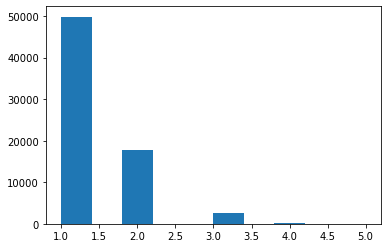

In [160]:
num_keeping_genres_per_track = []
for gs in keeping_root_tracks["genres"]:
    g_list = literal_eval(gs)
    num_keeping_genres_per_track.append(len([c for c in g_list if c in root_genre_ids]))
plt.hist(num_keeping_genres_per_track)

In [172]:
msk = []
pure_genre_labels = []
for gs in keeping_root_tracks["genres"]:
    g_list = literal_eval(gs)
    if len([c for c in g_list if c in root_genre_ids]) == 1:
        msk.append(True)
        pure_genre_labels.append([c for c in g_list if c in root_genre_ids][0])
    else:
        msk.append(False)
pure_genres = keeping_root_tracks[msk]

In [173]:
pure_genres["single_genre"] = pure_genre_labels
pure_genres["single_genre"].value_counts()

/home/matt/anaconda3/envs/AudioDL/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


38      14369
15      12389
12       5319
21       3919
17       3726
10       2994
1235     2058
5        1323
4         990
2         898
8         681
3         568
9         260
20        153
14        122
13         58
Name: single_genre, dtype: int64